In [1]:
import pandas as pd
from math import sqrt
import numpy as np
import importlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import sys
import os

# Get the absolute path to the 'src' directory
sys.path.append(os.path.abspath("../.."))
print(os.path.abspath("../.."))
project_root = os.path.abspath("../..")
print(sys.path)
print(project_root)

/home/julia/school/bakalarka/hospital_sim
['/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages', '/home/julia/school/bakalarka/hospital_sim']
/home/julia/school/bakalarka/hospital_sim


In [ ]:
# graph_path = "../../input/layouts/toScaleLayout.json"
# people_path = "../../input/people/manyPeople.json"
# event_path = "../../input/events/reqReorder.json"
# nurse_log_path = "../../output/nurseLog.csv"
# event_log_path = "../../output/eventLog.csv"

In [3]:
# import src.data_generator as dg
# import src.main
# importlib.reload(src.main)
from src.main import App
from src.data_generator import DataGenerator
from src.process_data import DataProcessor

pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
exp_layout = "../../input/layouts/expLayout.json"
two_nurses = "../../input/people/expPeople1.json" #two nurses, 4 patients each, 2 patients per room
one_nurse = project_root + "/input/people/expOneNurse.json"
exp_nurse_log = project_root + "/output/expNurseLog.csv"
exp_event_log = project_root + "/output/expEventLog.csv"
event_paths = ["expEvents1.json",
"expEvents2.json",
"expEvents3.json",
"expEvents4.json",
"expEvents5.json",
"expEvents6.json",
"expEvents7.json",
"expEvents8.json",]

In [5]:
full_event_paths = list(map(lambda x: project_root + "/input/events/" + x, event_paths))
print(full_event_paths)


['/home/julia/school/bakalarka/hospital_sim/input/events/expEvents1.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents2.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents3.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents4.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents5.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents6.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents7.json', '/home/julia/school/bakalarka/hospital_sim/input/events/expEvents8.json']


In [6]:
params1 = {"event_path" : full_event_paths[0], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "basic", "include_plans": True}
params2 = {"event_path" : full_event_paths[1], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "other", "include_plans": True}
params3 = {"event_path" : full_event_paths[2], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "basic", "include_plans": True}
params4 = {"event_path" : full_event_paths[3], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "other", "include_plans": True}
params5 = {"event_path" : full_event_paths[4], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "basic", "include_plans": False}
params6 = {"event_path" : full_event_paths[5], "nurse_cnt": 2, "people_path": two_nurses, "request_assigner": "other", "include_plans": False}
params7 = {"event_path" : full_event_paths[6], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "basic", "include_plans": False}
params8 = {"event_path" : full_event_paths[7], "nurse_cnt": 1, "people_path": one_nurse,  "request_assigner": "other", "include_plans": False}
params_lst = [params1, params2, params3, params4, params5, params6, params7, params8]

In [7]:
def generate_exp(params):
    # exp_events = project_root + "/input/events/" + exp_event_path
    # if nurse_cnt == 1:
    #     people_file = one_nurse
    # elif nurse_cnt == 2:
    #     people_file = two_nurses
    event_gen = DataGenerator(rnd=42, layout_file=exp_layout, people_file=params["people_path"], out_file=params["event_path"], request_assigner=params["request_assigner"],
                               include_plans=params["include_plans"])
    event_gen.create_events() 

In [8]:
def run_exp(params):
    app = App(exp_layout, params["people_path"], params["event_path"], exp_nurse_log, exp_event_log)
    app.run_simulation()

In [9]:
def process_nurse_data(params):
    dp = DataProcessor(exp_nurse_log, exp_event_log, params["people_path"])
    all_results = []
    for i in range(params["nurse_cnt"]):
        nurse_results = {}
        nurse_results["nurse_dst_walked"] = dp.nurse_dst_walked(i)
        nurse_results["nurse_time_walked"] = dp.nurse_time_walked(i)
        nurse_results["nurse_time_at_own_patients"] = dp.nurse_time_at_own_patients(i)
        nurse_results["nurse_time_at_other_patients"] = dp.nurse_time_at_other_patients(i)
        nurse_results["nurse_time_resting"] = dp.nurse_time_resting(i)
        all_results.append(nurse_results)
    return all_results

In [23]:
def process_patient_data(params):
    dp = DataProcessor(exp_nurse_log, exp_event_log, params["people_path"])
    all_results = []
    for i in range(8):
        patient_results = []
        for lvl in range(4):
            if lvl == 0:
                lvl = None

            level_results = {}
            level_results["total_time_waiting"] = dp.patient_total_time_waiting(i, lvl)
            level_results["avg_time_waiting"] = dp.patient_avg_time_waiting(i, lvl) #could be changed to histogram somehow
            patient_results.append(level_results)
        all_results.append(patient_results)
    return all_results


In [ ]:
for params in params_lst:
    generate_exp(params)

In [26]:
nurse_results = []
patient_results = []
done = []
for i, params in enumerate(params_lst):  
    run_exp(params)
    done.append(i)
    exp_results_nurse = process_nurse_data(params)
    nurse_results.append(exp_results_nurse)
    exp_results_patient = process_patient_data(params)
    patient_results.append(exp_results_patient)

importing
{'time': 2867.554752696838, 'event': 1969, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2155.170543109332, 'event': 1970, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 359.9096969448104, 'event': 1971, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2164.0140422755517, 'event': 1972, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 3491.6754677831796, 'event': 1973, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 2}
{'time': 654.5698819455622, 'event': 1974, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 2201.9513777578113, 'event': 1975, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 1048.4249047129508, 'event': 1976, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


importing
{'time': 2867.554752696838, 'event': 2046, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2155.170543109332, 'event': 2047, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 359.9096969448104, 'event': 2048, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2164.0140422755517, 'event': 2049, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 3491.6754677831796, 'event': 2050, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 2}
{'time': 654.5698819455622, 'event': 2051, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 2201.9513777578113, 'event': 2052, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 1048.4249047129508, 'event': 2053, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.

importing
{'time': 2867.554752696838, 'event': 2197, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2155.170543109332, 'event': 2198, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 359.9096969448104, 'event': 2199, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2164.0140422755517, 'event': 2200, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 3491.6754677831796, 'event': 2201, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 2}
{'time': 654.5698819455622, 'event': 2202, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 2201.9513777578113, 'event': 2203, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 1048.4249047129508, 'event': 2204, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


importing
{'time': 0, 'event': 2349, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 77.0, 'event': 2350, 'action': 'planned start', 'patient': 1, 'type': 'request', 'request_level': 1}
{'time': 154.0, 'event': 2351, 'action': 'planned start', 'patient': 2, 'type': 'request', 'request_level': 1}
{'time': 231.0, 'event': 2352, 'action': 'planned start', 'patient': 3, 'type': 'request', 'request_level': 1}
{'time': 0, 'event': 2353, 'action': 'planned start', 'patient': 4, 'type': 'request', 'request_level': 1}
{'time': 77.0, 'event': 2354, 'action': 'planned start', 'patient': 5, 'type': 'request', 'request_level': 1}
{'time': 154.0, 'event': 2355, 'action': 'planned start', 'patient': 6, 'type': 'request', 'request_level': 1}
{'time': 231.0, 'event': 2356, 'action': 'planned start', 'patient': 7, 'type': 'request', 'request_level': 1}
{'time': 1800, 'event': 2357, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


importing
{'time': 0, 'event': 2501, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 77.0, 'event': 2502, 'action': 'planned start', 'patient': 1, 'type': 'request', 'request_level': 1}
{'time': 154.0, 'event': 2503, 'action': 'planned start', 'patient': 2, 'type': 'request', 'request_level': 1}
{'time': 231.0, 'event': 2504, 'action': 'planned start', 'patient': 3, 'type': 'request', 'request_level': 1}
{'time': 308.0, 'event': 2505, 'action': 'planned start', 'patient': 4, 'type': 'request', 'request_level': 1}
{'time': 385.0, 'event': 2506, 'action': 'planned start', 'patient': 5, 'type': 'request', 'request_level': 1}
{'time': 462.0, 'event': 2507, 'action': 'planned start', 'patient': 6, 'type': 'request', 'request_level': 1}
{'time': 539.0, 'event': 2508, 'action': 'planned start', 'patient': 7, 'type': 'request', 'request_level': 1}
{'time': 1800, 'event': 2509, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 

In [21]:
run_exp(params_lst[0])

importing
{'time': 2867.554752696838, 'event': 1892, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2155.170543109332, 'event': 1893, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 359.9096969448104, 'event': 1894, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 2164.0140422755517, 'event': 1895, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'time': 3491.6754677831796, 'event': 1896, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 2}
{'time': 654.5698819455622, 'event': 1897, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 2201.9513777578113, 'event': 1898, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 1}
{'time': 1048.4249047129508, 'event': 1899, 'action': 'planned start', 'patient': 0, 'type': 'request', 'request_level': 3}
{'

In [24]:
res = process_patient_data(params_lst[0])
for i, patient in enumerate(res):
    print(i)
    for lvl in patient:
        print(lvl)

0
{'total_time_waiting': np.float64(3491.5104694574807), 'avg_time_waiting': np.float64(387.9456077174979)}
{'total_time_waiting': np.float64(2314.033907600383), 'avg_time_waiting': np.float64(1157.0169538001915)}
{'total_time_waiting': np.float64(99.4284509296881), 'avg_time_waiting': np.float64(99.4284509296881)}
{'total_time_waiting': np.float64(1078.0481109274097), 'avg_time_waiting': np.float64(179.67468515456827)}
1
{'total_time_waiting': np.float64(2621.1883284078986), 'avg_time_waiting': np.float64(291.2431476008776)}
{'total_time_waiting': np.float64(1403.2223351501448), 'avg_time_waiting': np.float64(701.6111675750724)}
{'total_time_waiting': np.float64(712.5940572335456), 'avg_time_waiting': np.float64(237.53135241118187)}
{'total_time_waiting': np.float64(505.37193602420825), 'avg_time_waiting': np.float64(126.34298400605206)}
2
{'total_time_waiting': np.float64(1473.4999916133502), 'avg_time_waiting': np.float64(368.37499790333754)}
{'total_time_waiting': np.float64(550.69

/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/julia/school/bakalarka/simVenv/lib/python3.12/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [11]:
for res in nurse_results:
    print(res)

[{'nurse_dst_walked': 218.0, 'nurse_time_walked': np.float64(218.0), 'nurse_time_at_own_patients': np.float64(2729.925981804981), 'nurse_time_at_other_patients': 0, 'nurse_time_resting': np.float64(1654.8915498724905)}, {'nurse_dst_walked': 320.0, 'nurse_time_walked': np.float64(320.0), 'nurse_time_at_own_patients': np.float64(3566.151891352622), 'nurse_time_at_other_patients': 0, 'nurse_time_resting': np.float64(716.6656403248494)}]
[{'nurse_dst_walked': 184.0, 'nurse_time_walked': np.float64(184.0), 'nurse_time_at_own_patients': np.float64(1086.1733966317145), 'nurse_time_at_other_patients': np.float64(435.50261512903575), 'nurse_time_resting': np.float64(1806.5770403503761)}, {'nurse_dst_walked': 133.0, 'nurse_time_walked': np.float64(133.0), 'nurse_time_at_own_patients': np.float64(1197.678855458601), 'nurse_time_at_other_patients': np.float64(510.2978201533394), 'nurse_time_resting': np.float64(1671.2763764991857)}]
[{'nurse_dst_walked': 923.4145994955186, 'nurse_time_walked': np.

In [32]:
for i, exp in enumerate(patient_results):
    print("\nexperiment ", i)
    for j, patient in enumerate(exp):
        print("patient", j)
        for k, lvl in enumerate(patient):
            print("level", k, lvl)


experiment  0
patient 0
level 0 {'total_time_waiting': np.float64(3491.5104694574807), 'avg_time_waiting': np.float64(387.9456077174979)}
level 1 {'total_time_waiting': np.float64(2314.033907600383), 'avg_time_waiting': np.float64(1157.0169538001915)}
level 2 {'total_time_waiting': np.float64(99.4284509296881), 'avg_time_waiting': np.float64(99.4284509296881)}
level 3 {'total_time_waiting': np.float64(1078.0481109274097), 'avg_time_waiting': np.float64(179.67468515456827)}
patient 1
level 0 {'total_time_waiting': np.float64(2621.1883284078986), 'avg_time_waiting': np.float64(291.2431476008776)}
level 1 {'total_time_waiting': np.float64(1403.2223351501448), 'avg_time_waiting': np.float64(701.6111675750724)}
level 2 {'total_time_waiting': np.float64(712.5940572335456), 'avg_time_waiting': np.float64(237.53135241118187)}
level 3 {'total_time_waiting': np.float64(505.37193602420825), 'avg_time_waiting': np.float64(126.34298400605206)}
patient 2
level 0 {'total_time_waiting': np.float64(14

[np.float64(3491.5104694574807), np.float64(2621.1883284078986), np.float64(1473.4999916133502), np.float64(2399.065013473368), np.float64(8406.638274685183), np.float64(6690.551417505502), np.float64(9575.10807240368), np.float64(3301.9958509181806), np.float64(649.0777436002035), np.float64(530.3719360242083), np.float64(292.40627425734084), 0, np.float64(306.1298412591684), np.float64(470.43831699399846), np.float64(399.99692894498816), np.float64(220.17722589935352), np.float64(13431.81404184104), np.float64(20205.974125469424), np.float64(11082.16553403094), np.float64(16549.79308410425), np.float64(25102.72186313176), np.float64(21387.622864413872), np.float64(31485.84453323453), np.float64(10991.665631940483), np.float64(298.26455631788224), np.float64(349.88730315319003), np.float64(295.40627425734084), 0, np.float64(94.17173619087816), np.float64(299.71922846584073), np.float64(2838.415597343379), 0, np.float64(2643.3628172899244), np.float64(1801.885694944836), np.float64(259

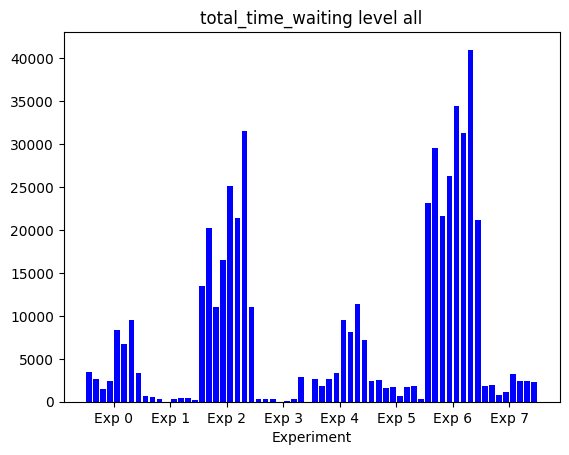

[np.float64(2314.033907600383), np.float64(1403.2223351501448), np.float64(550.6976085059678), np.float64(2216.2767173837474), np.float64(7741.313188201915), np.float64(2411.8330533455505), np.float64(7960.362476424163), np.float64(2316.792113065308), 0, 0, 0, 0, np.float64(211.95810506829025), np.float64(170.71908852815773), np.float64(223.9734284028931), np.float64(75.93428360004577), np.float64(11610.040578974626), np.float64(11477.696389823013), np.float64(4993.213178733202), np.float64(16344.678808493783), np.float64(22125.07577811902), np.float64(5654.297393193143), np.float64(21978.51839460358), np.float64(5636.890526756222), 0, 0, 0, 0, 0, 0, np.float64(2732.803946871062), 0, np.float64(1473.886255432827), np.float64(579.9197016870821), np.float64(1616.2715497651282), np.float64(2713.6164670700855), np.float64(9120.764173541571), np.float64(3879.457959833123), np.float64(9769.419906508323), np.float64(6210.519525927952), np.float64(1743.599967457636), np.float64(2036.7582724783

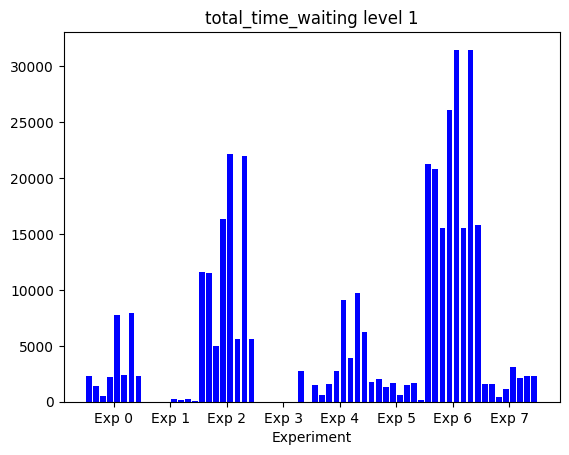

[np.float64(99.4284509296881), np.float64(712.5940572335456), np.float64(453.46968698380124), np.float64(182.7882960896211), np.float64(588.1533502923903), np.float64(1932.1120953405969), np.float64(432.1232985337558), np.float64(296.9956713186634), 0, 0, 0, 0, 0, 0, 0, 0, np.float64(99.4284509296881), np.float64(4793.993421273728), np.float64(1277.840267295157), np.float64(205.11427561046662), np.float64(1838.0820368542632), np.float64(7703.627899126764), np.float64(5603.693206235636), np.float64(4322.914036439212), 0, 0, 0, 0, 0, 0, 0, 0, np.float64(99.4284509296881), np.float64(716.5940572335456), np.float64(514.546275580627), np.float64(586.8219829103043), np.float64(353.34602828853895), np.float64(1837.7398946556375), np.float64(432.1232985337558), np.float64(296.9956713186634), 0, 0, 0, 0, 0, 0, 0, 0, np.float64(99.4284509296881), np.float64(4793.993421273728), np.float64(1277.840267295157), np.float64(205.11427561046662), np.float64(1838.0820368542632), np.float64(7703.627899126

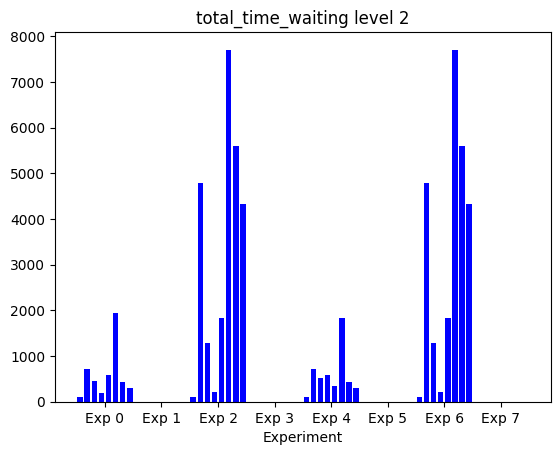

[np.float64(1078.0481109274097), np.float64(505.37193602420825), np.float64(469.3326961235811), 0, np.float64(77.17173619087816), np.float64(2346.606268819356), np.float64(1182.6222974457628), np.float64(688.2080665342091), np.float64(649.0777436002035), np.float64(530.3719360242083), np.float64(292.40627425734084), 0, np.float64(94.17173619087816), np.float64(299.71922846584073), np.float64(176.02350054209506), np.float64(144.24294229930774), np.float64(1722.3450119367258), np.float64(3934.2843143726836), np.float64(4811.112088002583), 0, np.float64(1139.5640481584774), np.float64(8029.697572093962), np.float64(3903.6329323953164), np.float64(1031.8610687450494), np.float64(298.26455631788224), np.float64(349.88730315319003), np.float64(295.40627425734084), 0, np.float64(94.17173619087816), np.float64(299.71922846584073), np.float64(105.61165047231687), 0, np.float64(1070.0481109274097), np.float64(505.37193602420825), np.float64(461.3326961235811), 0, np.float64(77.17173619087816), n

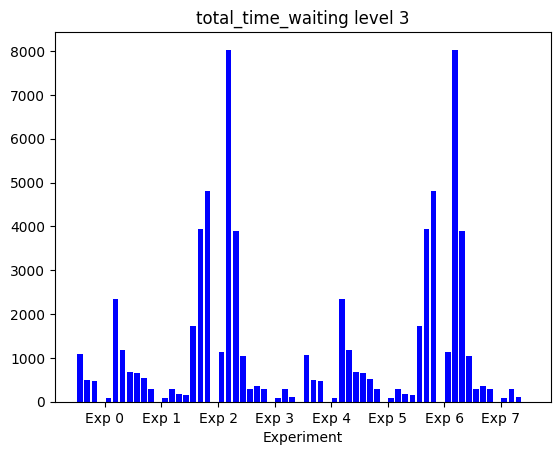

[np.float64(387.9456077174979), np.float64(291.2431476008776), np.float64(368.37499790333754), np.float64(599.766253368342), np.float64(934.0709194094648), np.float64(743.394601945056), np.float64(1063.9008969337422), np.float64(825.4989627295452), np.float64(108.17962393336724), np.float64(132.59298400605206), np.float64(146.20313712867042), np.float64(nan), np.float64(102.0432804197228), np.float64(156.8127723313328), np.float64(99.99923223624704), np.float64(110.08861294967676), np.float64(1492.423782426782), np.float64(2245.1082361632693), np.float64(2770.541383507735), np.float64(4137.448271026063), np.float64(2789.191318125751), np.float64(2376.4025404904296), np.float64(3498.4271703593927), np.float64(2747.9164079851207), np.float64(99.42151877262741), np.float64(116.62910105106334), np.float64(147.70313712867042), np.float64(nan), np.float64(47.08586809543908), np.float64(149.85961423292036), np.float64(1419.2077986716895), np.float64(nan), np.float64(240.3057106627204), np.flo

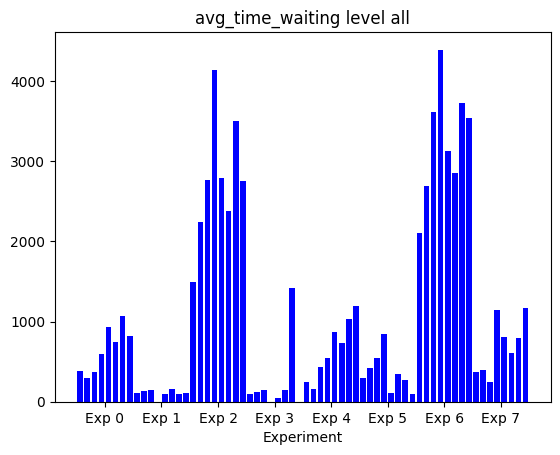

[np.float64(1157.0169538001915), np.float64(701.6111675750724), np.float64(550.6976085059678), np.float64(738.7589057945825), np.float64(1935.3282970504788), np.float64(2411.8330533455505), np.float64(1990.0906191060408), np.float64(2316.792113065308), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(211.95810506829025), np.float64(170.71908852815773), np.float64(111.98671420144655), np.float64(75.93428360004577), np.float64(5805.020289487313), np.float64(5738.848194911507), np.float64(4993.213178733202), np.float64(5448.226269497928), np.float64(5531.268944529755), np.float64(5654.297393193143), np.float64(5494.629598650895), np.float64(5636.890526756222), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(2732.803946871062), np.float64(nan), np.float64(368.47156385820676), np.float64(144.97992542177053), np.float64(538.7571832550427), np.float64(542.7232934140171), np.float64(1520.127362256928

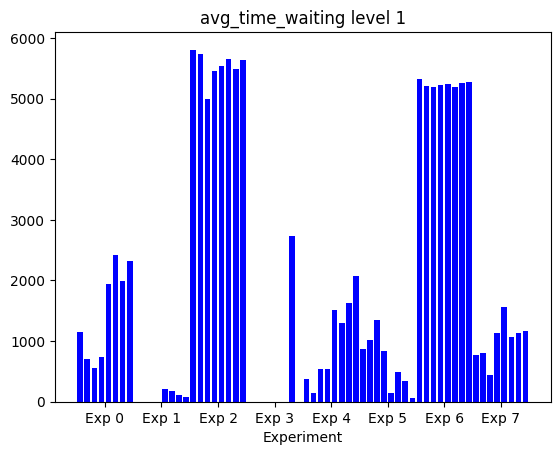

[np.float64(99.4284509296881), np.float64(237.53135241118187), np.float64(453.46968698380124), np.float64(182.7882960896211), np.float64(196.05111676413011), np.float64(483.0280238351492), np.float64(216.0616492668779), np.float64(148.4978356593317), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(99.4284509296881), np.float64(1597.9978070912427), np.float64(1277.840267295157), np.float64(205.11427561046662), np.float64(612.6940122847544), np.float64(1925.906974781691), np.float64(2801.846603117818), np.float64(2161.457018219606), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(nan), np.float64(99.4284509296881), np.float64(238.8646857445152), np.float64(514.546275580627), np.float64(586.8219829103043), np.float64(117.78200942951298), np.float64(459.4349736639094), np.float64(216.0616492668779), np.float64(1

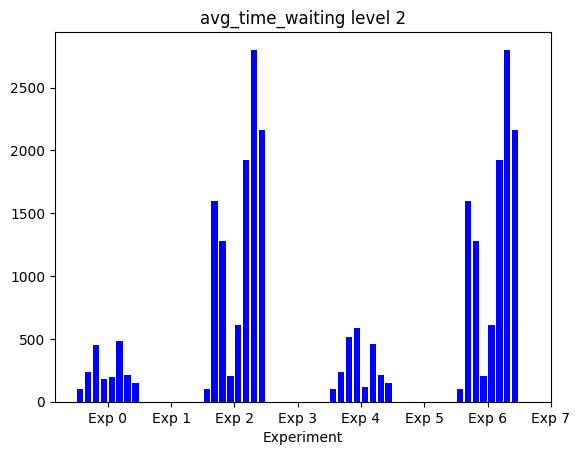

[np.float64(179.67468515456827), np.float64(126.34298400605206), np.float64(234.66634806179056), np.float64(nan), np.float64(38.58586809543908), np.float64(586.651567204839), np.float64(394.20743248192093), np.float64(688.2080665342091), np.float64(108.17962393336724), np.float64(132.59298400605206), np.float64(146.20313712867042), np.float64(nan), np.float64(47.08586809543908), np.float64(149.85961423292036), np.float64(88.01175027104753), np.float64(144.24294229930774), np.float64(287.0575019894543), np.float64(983.5710785931709), np.float64(2405.5560440012914), np.float64(nan), np.float64(569.7820240792387), np.float64(2007.4243930234904), np.float64(1301.2109774651055), np.float64(1031.8610687450494), np.float64(99.42151877262741), np.float64(116.62910105106334), np.float64(147.70313712867042), np.float64(nan), np.float64(47.08586809543908), np.float64(149.85961423292036), np.float64(105.61165047231687), np.float64(nan), np.float64(178.34135182123495), np.float64(126.34298400605206

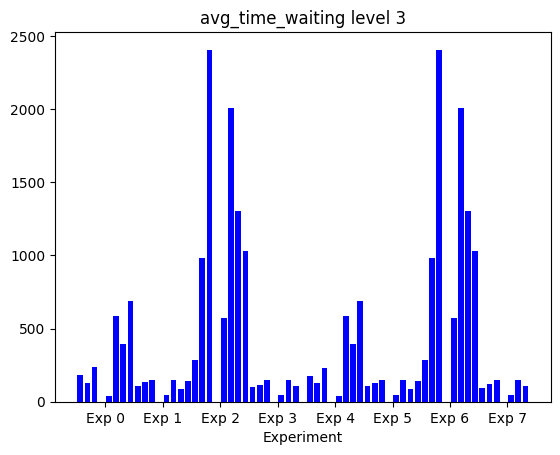

In [ ]:
def plot_patient_stat(stat_name, level):
    if level == 0:
        level_title = "all"
    else:
        level_title = level
    values = []
    for i, exp in enumerate(patient_results):
        for j, patient in enumerate(exp):
            values.append(patient[level][stat_name])

    print(values)
    print(len(values))

    labels = ["Exp " + str(x) for x in range(8)]
    # colors = ['red' if i % 2 == 0 else 'blue' for i in range(len(values))]
    x = np.arange(len(values))
    plt.bar(x, values, color="blue")
    plt.xticks(ticks=np.arange(3.5, len(values), 8), labels=labels)

    plt.xlabel("Experiment")
    plt.ylabel("")
    plt.title(stat_name + " level " + str(level_title))

    # Show the chart
    plt.show()

for i in range(4):
    plot_patient_stat("total_time_waiting", i)

for i in range(4):
    plot_patient_stat("avg_time_waiting", i)

['Exp 0', 'Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6', 'Exp 7']
[218.0, 320.0, 184.0, 133.0, 923.4145994955186, 0, 220.0, 0, 214.0, 300.0, 194.0, 177.0, 953.4145994955186, 0, 284.0, 0]


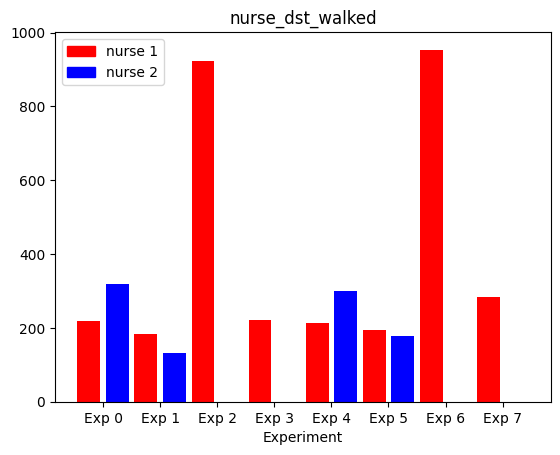

['Exp 0', 'Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6', 'Exp 7']
[np.float64(218.0), np.float64(320.0), np.float64(184.0), np.float64(133.0), np.float64(923.4145994955186), 0, np.float64(220.0), 0, np.float64(214.0), np.float64(300.0), np.float64(193.99999999999977), np.float64(177.0), np.float64(953.4145994955186), 0, np.float64(284.0), 0]


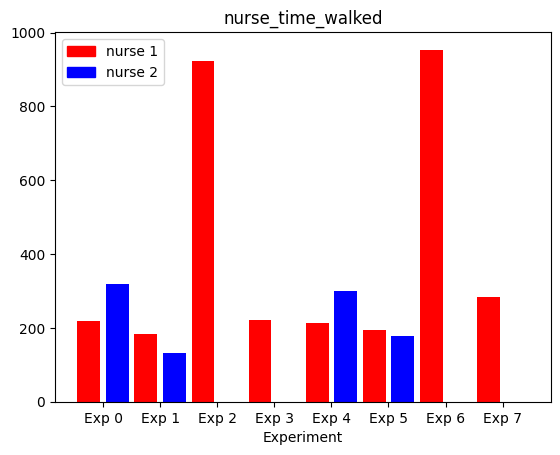

['Exp 0', 'Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6', 'Exp 7']
[np.float64(2729.925981804981), np.float64(3566.151891352622), np.float64(1086.1733966317145), np.float64(1197.678855458601), np.float64(6333.445313102287), 0, np.float64(1831.6931639020427), 0, np.float64(2629.7386960400545), np.float64(3512.481163070363), np.float64(1333.2370491493207), np.float64(1524.0110954256727), np.float64(6333.445313102287), 0, np.float64(2205.7023657649474), 0]


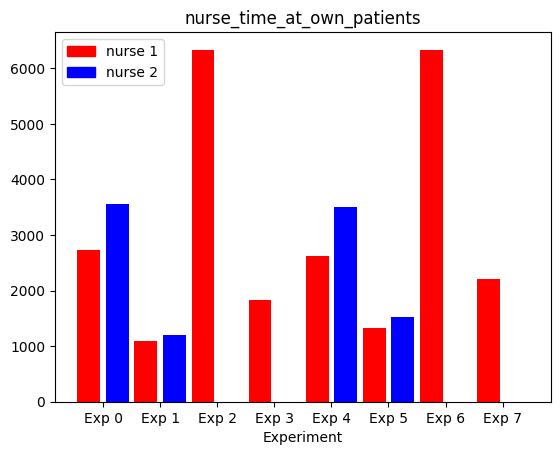

['Exp 0', 'Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6', 'Exp 7']
[0, 0, np.float64(435.50261512903575), np.float64(510.2978201533394), 0, 0, 0, 0, 0, 0, np.float64(435.50261512903575), np.float64(510.2978201533394), 0, 0, 0, 0]


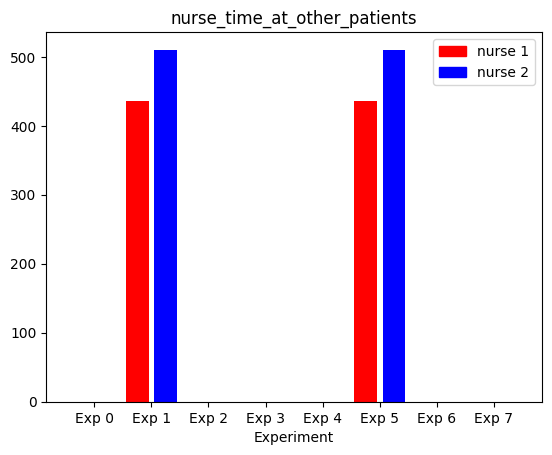

['Exp 0', 'Exp 1', 'Exp 2', 'Exp 3', 'Exp 4', 'Exp 5', 'Exp 6', 'Exp 7']
[np.float64(1654.8915498724905), np.float64(716.6656403248494), np.float64(1806.5770403503761), np.float64(1671.2763764991857), np.float64(1208.5725537930532), 0, np.float64(1463.5598882090835), 0, np.float64(1705.4149107929334), np.float64(736.6724437626249), np.float64(1549.51338783277), np.float64(1300.9441365321138), np.float64(1178.5725537930532), 0, np.float64(1029.5506863461787), 0]


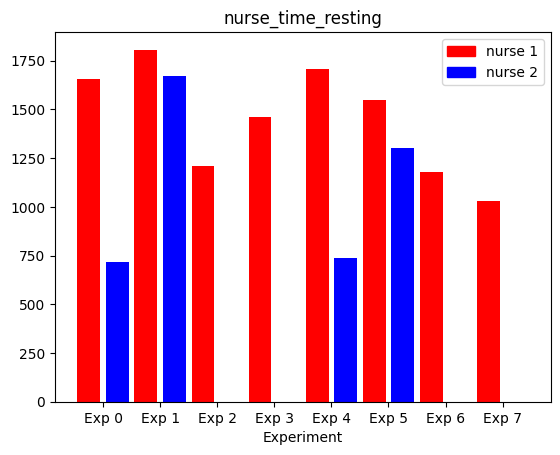

In [33]:
def plot_nurse_stat(stat_name):
    values = []
    for res in nurse_results:
        values.append(res[0][stat_name])
        if len(res) == 2:
            values.append(res[1][stat_name])
        else:
            values.append(0)

    labels = ["Exp " + str(x) for x in range(8)]
    colors = ['red' if i % 2 == 0 else 'blue' for i in range(len(values))]
    print(labels)
    print(values)
    x = np.arange(len(values))

    plt.bar(x, values, color=colors)

    plt.xticks(ticks=np.arange(0.5, len(values), 2), labels=labels)

    # red_patch = plt.Line2D([0], [0], color='red', lw=4, label='nurse 1')
    # blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='nurse 2')
    red_patch = mpatches.Circle((0, 0), radius=0.1, color='red', label='nurse 1')
    blue_patch = mpatches.Circle((0, 0), radius=0.1, color='blue', label='nurse 2')
    plt.legend(handles=[red_patch, blue_patch])

    # Customize chart
    plt.xlabel("Experiment")
    plt.ylabel("")
    plt.title(stat_name)

    # Show the chart
    plt.show()

nurse_stats = nurse_results[0][0].keys()
for stat in nurse_stats:
    plot_nurse_stat(stat)

In [31]:
print(results1)

{'nurse_dst_walked0': 218.0, 'nurse_time_walked0': np.float64(218.0), 'nurse_time_at_own_patients0': np.float64(2729.925981804981), 'nurse_time_at_other_patients0': 0, 'nurse_time_resting0': np.float64(1654.8915498724905), 'nurse_dst_walked1': 320.0, 'nurse_time_walked1': np.float64(320.0), 'nurse_time_at_own_patients1': np.float64(3566.151891352622), 'nurse_time_at_other_patients1': 0, 'nurse_time_resting1': np.float64(716.6656403248494)}
